# Code Challenge - Task 1: Web scraping to gain company insights

***
*Author: Kadriye Nur Bakirci*
***
Contact regarding the code: nur.bakirci@gmail.com
***

This notebook solves data cleaning and finding insights task given a dataset.

This notebook is divided into 5 main sections.



1.   **Environment Setup**
2.   **Data Loading**
3.   **Text Preprocessing**
4.   **Sentiment Analysis**
5.   **Topic Modelling**

[Datasets Location](https://github.com/kadnur/BritishAirwaysCaseStudy/blob/main/Data/BA_reviews.csv)

## Environment Setup


First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file.

### Import Libraries

General Use Libraries

In [1]:
# Import important libraries
import pandas as pd
import numpy as np

# Libraries for text preprocessing
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Library for sentiment analysis
from textblob import TextBlob

# Library for word cloud
from wordcloud import WordCloud, STOPWORDS

# Libraries for topic modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Libraries for graphs
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pyLDAvis
# Set style and context for seaborn
sns.set_style("whitegrid")

# Define some rules of displaying DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.1 MB/s eta 0:00:00


### Import the Data

Clone repository containing the data.

In [2]:
# Clone the repo containing the raw data
!git clone -l -s https://github.com/kadnur/BritishAirwaysCaseStudy.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 1.18 MiB | 8.07 MiB/s, done.


In [3]:
# Move to the relative path containing the cloned repo's data
%cd cloned-repo/Data
!ls

/content/cloned-repo/Data
BA_reviews.csv


## Data loading

Convert the dataset file into Pandas Dataframe.

In [4]:
# Read reviews data csv data file
reviews = pd.read_csv('BA_reviews.csv')

Explore the first 10 instances of reviews.

In [5]:
# Check the head as a sanity check of correct loading of the data
reviews.head(10)

,Unnamed: 0,reviews
0,0,"Not Verified | The flight was comfortable enough but with an hour delay on the return leg. However, on both leg I was told I had to put my very small and expensive cabin case into the hold as the flight was full. Having done so I was not amused to see other passengers bringing much larger cases into the cabin. BA should stick to their cabin bag size limit and not inconvenience those who comply."
1,1,"✅ Trip Verified | We had a really good flying experience with BA, travelling as a young family of 4. The flights left on time and we even arrived early for nearly each one of our flights. Food was generous and quite tasty for Economy class with the crew coming around with water/drinks throughout the flights. Our checked luggage also arrived safely and undamaged both at VCE and our return flight to YUL. On all of our flights the crew were attentive, friendly, and helpful with us and our children, especially the gentlemen who served us on the return flights from VCE to YUL on March 5th. The B787-8 interior is really dated and really needs to be updated to compete with their European counterparts. There were panels squeaking loudly when we hit turbulence, seat covers coming off the seats, and tray tables which were not level and loose for eating. The IFE on the B787-8 worked fine, but it definitely wasn't as responsive and did not have a newer, larger screen like the ones on the B777-200. Thankfully, the B777-200 have had their interior updated but the one we flew on had a clogged sink in one of the lavatories, which created problems for passengers. Unfortunately, on nearly all of our flights, there was garbage left in the seat pockets and the floors weren't quite as clean. On the incoming flight to LHR, the B787-8 was not assigned a gate because we arrived early into the airport, which resulted in significant delays for the airport buses to get to the plane and also slowed down the deplaning process. We would definitely consider flying trans-Atlantic with BA again, as we received value and service for the fare we paid."
2,2,"✅ Trip Verified | Waited an hour to check-in at the Paphos business check-in. Staff utterly incompetent. Flight crew in business class removed my ruck sack from the flight bins without my consent to make way for another customer luggage. I was then coerced to have my luggage at my feet throughout my flight. Utterly outrageous, last thing you would expect in BA business class."
3,3,"Not Verified | Not a great experience at all, from the outset it was poorly managed as they bused us out to a parking slot only to have us wait for 15 minutes in the bus as the plane was ready. BA business class is not Business class. Tired, small and generally not worth the ticket price. Tables that don’t sit straight, arm rests that aren’t secure and terrible screens. It’s not a patch on first class airlines which is apparently where BA think they should be. They have a long way to go."
4,4,"✅ Trip Verified | Boarding was difficult caused by vast majority of the passengers carrying too much hand luggage. FA's were friendly. The seats on BA for European flights are extremely narrow. There was a choice of breakfast and very surprising the Champagne Castelau on European flights is of a better quality as the brand used in club on intercontinental flight. Nothing wrong with this flight, however not pleasant due to the unpleasant seats. Waiting time at Brussels for luggage some 20 minutes what is very acceptable."
5,5,"✅ Trip Verified | Boarding started with a delay of some 20 minutes , everybody could see members of the team only did arrive 5 en 3 minutes before the announced boarding time. We had to wait outside for nearly 15 minutes . It was hot ! Unfortunately flying from Barbados to London in Club Class was an underwhelming experience. BA is not performing a great performance on international flights anymore. Lucky the 777 had the new configuration. As welcome aboard Champagne or fruit juice, the glasses were

Explore the last 10 instances of Samplesales.

In [6]:
# Check the head as a sanity check of correct loading of the data
reviews.tail(10)

,Unnamed: 0,reviews
3761,3761,"LHR-JFK-LAX-LHR. Check in was ok apart from being snapped at for being too early to check in come back in 5 minutes. Got through security quickly. Terminal 5 has very good facilities. We boarded the aircraft and sat in our seats realising we had a long haul flight in short haul seat pitch with a very small seat width designed for a below averaged size person. This wasn't at all helped by the passenger in front reclining their seat immediately after the seatbelt sign went off. Food was basic small meal return flight included a breakfast consisting of a small bread roll with a bitesize cereal bar. Both legs went at least 4hrs without any food/drink service. IFE was quite good have to watch 5 minutes of adverts before the programme starts. Family near us had a child with no working IFE for return flight. What annoyed us most was on the return leg we were told by the flight attendant ""Do you mind moving forward so the couple behind you can eat?"". We did presuming it was policy whilst finding it strange it never happened on the outbound flight. No one else was asked to move the seat forward so we felt angered that we were the only ones asked. It is 100% not surprising BA has fallen behind other airlines in recent years as middle eastern airlines such as Qatar provide a much better service for a similar price."
3762,3762,HKG-LHR in New Club World on Boeing 777-300 - 26/08/12. Bought ticket in WT+ and managed to get a last minute upgrade using Avios to Club. First time in a premium cabin. The seats are comfortable if a little narrow but they easily move to the lie flat position meaning I was able to get 6 hours sleep. Plenty of good quality champagne and wines offered before and during dinner. 3 course dinner sounded a lot better than it actually tasted. BA should think more about ease of food preparation on board rather than trying to do lavish dishes that don't quite come off. Breakfast was better than expected - plenty of choice and a good selection of fresh rolls and croissants. AVOD worked well. My only complaint was that the cabin crew found it very difficult to be friendly. Every request appeared to be an inconvenience to them - little things like milk and sugar for my coffee. Generally though I would have to give Club World the thumbs up if only because a lie flat bed is infinitely more appealing than cramped Economy on a 12 hour flight. As I was in Club through an Avios upgrade I cannot comment on the value for money. Had I paid full fare I might have expected more.
3763,3763,YYZ to LHR - July 2012 - I flew overnight in premium economy on a 767. I chose this flight because on the 767 the layout is 2-2-2. I chose an aisle seat in the middle 2 so I could go to the washroom etc without disturbing y seat ate and vice versa. The seats are comparable to North American business class except with narrower arm rests. (better than economy but still not meant for sharing). The entree food was the same as business class and I wasn't really impressed. It wasn't bad but wasn't good either. I would definitely fly BA on this route again mostly because of the layout and the option to fly premium economy.
3764,3764,Flew return in CW from LHR to BKK in August 2012. The positives of both flights were: they were on time seats were comfortable and lounges were good. The negatives were: very poor food selections on board (over cooked and uninspiring) very mixed crews - depending on what side of the aircraft you sat you got a totally different in-flight experience - some of the cabin crew should get new jobs as passengers are a severe inconvenience to them and the IFE was unreliable - on both flights the IFE had to be re-set at least once. Overall the flights were fine and I will use BA again if the price is right.
3765,3765,Flew LHR - VIE return operated by bmi but BA aircraft. A319 aircraft was clearly new and very clean. The crew were smiling friendly and helpful. No in-flight entertainment but not a problem on t

Here we saw that there is a one issue of data loading which is unnamed column. Let's drop this column.

In [7]:
# Drop unnamed column
reviews = reviews.drop("Unnamed: 0", axis=1)

In [8]:
# Check DataFrame
reviews.head()

,reviews
0,"Not Verified | The flight was comfortable enough but with an hour delay on the return leg. However, on both leg I was told I had to put my very small and expensive cabin case into the hold as the flight was full. Having done so I was not amused to see other passengers bringing much larger cases into the cabin. BA should stick to their cabin bag size limit and not inconvenience those who comply."
1,"✅ Trip Verified | We had a really good flying experience with BA, travelling as a young family of 4. The flights left on time and we even arrived early for nearly each one of our flights. Food was generous and quite tasty for Economy class with the crew coming around with water/drinks throughout the flights. Our checked luggage also arrived safely and undamaged both at VCE and our return flight to YUL. On all of our flights the crew were attentive, friendly, and helpful with us and our children, especially the gentlemen who served us on the return flights from VCE to YUL on March 5th. The B787-8 interior is really dated and really needs to be updated to compete with their European counterparts. There were panels squeaking loudly when we hit turbulence, seat covers coming off the seats, and tray tables which were not level and loose for eating. The IFE on the B787-8 worked fine, but it definitely wasn't as responsive and did not have a newer, larger screen like the ones on the B777-200. Thankfully, the B777-200 have had their interior updated but the one we flew on had a clogged sink in one of the lavatories, which created problems for passengers. Unfortunately, on nearly all of our flights, there was garbage left in the seat pockets and the floors weren't quite as clean. On the incoming flight to LHR, the B787-8 was not assigned a gate because we arrived early into the airport, which resulted in significant delays for the airport buses to get to the plane and also slowed down the deplaning process. We would definitely consider flying trans-Atlantic with BA again, as we received value and service for the fare we paid."
2,"✅ Trip Verified | Waited an hour to check-in at the Paphos business check-in. Staff utterly incompetent. Flight crew in business class removed my ruck sack from the flight bins without my consent to make way for another customer luggage. I was then coerced to have my luggage at my feet throughout my flight. Utterly outrageous, last thing you would expect in BA business class."
3,"Not Verified | Not a great experience at all, from the outset it was poorly managed as they bused us out to a parking slot only to have us wait for 15 minutes in the bus as the plane was ready. BA business class is not Business class. Tired, small and generally not worth the ticket price. Tables that don’t sit straight, arm rests that aren’t secure and terrible screens. It’s not a patch on first class airlines which is apparently where BA think they should be. They have a long way to go."
4,"✅ Trip Verified | Boarding was difficult caused by vast majority of the passengers carrying too much hand luggage. FA's were friendly. The seats on BA for European flights are extremely narrow. There was a choice of breakfast and very surprising the Champagne Castelau on European flights is of a better quality as the brand used in club on intercontinental flight. Nothing wrong with this flight, however not pleasant due to the unpleasant seats. Waiting time at Brussels for luggage some 20 minutes what is very acceptable."


In [9]:
# Check our dataset shape
reviews.shape

(3771, 1)

---

## Text Preprocessing

We need to clean and transform it into a suitable format for further processing.

Text preprocessing involves steps such as removing punctuation, stopwords, numbers, and irrelevant characters, converting text to lowercase, tokenizing text into words or sentences, stemming or lemmatizing words to their root forms, and encoding text as numerical vectors.

Python offers many libraries and tools for text preprocessing, such as NLTK, spaCy, gensim, and scikit-learn.


In [10]:
# Extracting the information before '|' into a new column
reviews['trips_verified'] = reviews['reviews'].apply(lambda x: x.split('|')[0].strip())

# Remove special characters, emojis, and non-standard characters from the 'info_before_symbol' column
reviews['trips_verified'] = reviews['trips_verified'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Map verified trips: if trip is verified then 1 else 0, and handle empty values
reviews['trips_verified'] = reviews['trips_verified'].map({'Not Verified': 0, ' Trip Verified': 1})

# Fill empty values with no information
reviews['trips_verified'].fillna('no_information', inplace=True)

# Removing emojis and extracting reviews after '|' symbol
reviews['reviews'] = reviews['reviews'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x.split('|', 1)[-1]))

# Re-order columns
cols = ['trips_verified', 'reviews']
reviews = reviews[cols]

# Check dataframe
reviews.head()

,trips_verified,reviews
0,0.0,"The flight was comfortable enough but with an hour delay on the return leg. However, on both leg I was told I had to put my very small and expensive cabin case into the hold as the flight was full. Having done so I was not amused to see other passengers bringing much larger cases into the cabin. BA should stick to their cabin bag size limit and not inconvenience those who comply."
1,1.0,"We had a really good flying experience with BA, travelling as a young family of 4. The flights left on time and we even arrived early for nearly each one of our flights. Food was generous and quite tasty for Economy class with the crew coming around with water/drinks throughout the flights. Our checked luggage also arrived safely and undamaged both at VCE and our return flight to YUL. On all of our flights the crew were attentive, friendly, and helpful with us and our children, especially the gentlemen who served us on the return flights from VCE to YUL on March 5th. The B787-8 interior is really dated and really needs to be updated to compete with their European counterparts. There were panels squeaking loudly when we hit turbulence, seat covers coming off the seats, and tray tables which were not level and loose for eating. The IFE on the B787-8 worked fine, but it definitely wasn't as responsive and did not have a newer, larger screen like the ones on the B777-200. Thankfully, the B777-200 have had their interior updated but the one we flew on had a clogged sink in one of the lavatories, which created problems for passengers. Unfortunately, on nearly all of our flights, there was garbage left in the seat pockets and the floors weren't quite as clean. On the incoming flight to LHR, the B787-8 was not assigned a gate because we arrived early into the airport, which resulted in significant delays for the airport buses to get to the plane and also slowed down the deplaning process. We would definitely consider flying trans-Atlantic with BA again, as we received value and service for the fare we paid."
2,1.0,"Waited an hour to check-in at the Paphos business check-in. Staff utterly incompetent. Flight crew in business class removed my ruck sack from the flight bins without my consent to make way for another customer luggage. I was then coerced to have my luggage at my feet throughout my flight. Utterly outrageous, last thing you would expect in BA business class."
3,0.0,"Not a great experience at all, from the outset it was poorly managed as they bused us out to a parking slot only to have us wait for 15 minutes in the bus as the plane was ready. BA business class is not Business class. Tired, small and generally not worth the ticket price. Tables that dont sit straight, arm rests that arent secure and terrible screens. Its not a patch on first class airlines which is apparently where BA think they should be. They have a long way to go."
4,1.0,"Boarding was difficult caused by vast majority of the passengers carrying too much hand luggage. FA's were friendly. The seats on BA for European flights are extremely narrow. There was a choice of breakfast and very surprising the Champagne Castelau on European flights is of a better quality as the brand used in club on intercontinental flight. Nothing wrong with this flight, however not pleasant due to the unpleasant seats. Waiting time at Brussels for luggage some 20 minutes what is very acceptable."


In [11]:
# Create a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, emojis, and non-standard characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [12]:
# Apply preprocessing to each review
reviews['clean_reviews'] = reviews['reviews'].apply(preprocess_text)

# Display the cleaned reviews
reviews.head()

,trips_verified,reviews,clean_reviews
0,0.0,"The flight was comfortable enough but with an hour delay on the return leg. However, on both leg I was told I had to put my very small and expensive cabin case into the hold as the flight was full. Having done so I was not amused to see other passengers bringing much larger cases into the cabin. BA should stick to their cabin bag size limit and not inconvenience those who comply.",flight comfortable enough hour delay return leg however leg told put small expensive cabin case hold flight full done amused see passenger bringing much larger case cabin ba stick cabin bag size limit inconvenience comply
1,1.0,"We had a really good flying experience with BA, travelling as a young family of 4. The flights left on time and we even arrived early for nearly each one of our flights. Food was generous and quite tasty for Economy class with the crew coming around with water/drinks throughout the flights. Our checked luggage also arrived safely and undamaged both at VCE and our return flight to YUL. On all of our flights the crew were attentive, friendly, and helpful with us and our children, especially the gentlemen who served us on the return flights from VCE to YUL on March 5th. The B787-8 interior is really dated and really needs to be updated to compete with their European counterparts. There were panels squeaking loudly when we hit turbulence, seat covers coming off the seats, and tray tables which were not level and loose for eating. The IFE on the B787-8 worked fine, but it definitely wasn't as responsive and did not have a newer, larger screen like the ones on the B777-200. Thankfully, the B777-200 have had their interior updated but the one we flew on had a clogged sink in one of the lavatories, which created problems for passengers. Unfortunately, on nearly all of our flights, there was garbage left in the seat pockets and the floors weren't quite as clean. On the incoming flight to LHR, the B787-8 was not assigned a gate because we arrived early into the airport, which resulted in significant delays for the airport buses to get to the plane and also slowed down the deplaning process. We would definitely consider flying trans-Atlantic with BA again, as we received value and service for the fare we paid.",really good flying experience ba travelling young family 4 flight left time even arrived early nearly one flight food generous quite tasty economy class crew coming around waterdrinks throughout flight checked luggage also arrived safely undamaged vce return flight yul flight crew attentive friendly helpful u child especially gentleman served u return flight vce yul march 5th b7878 interior really dated really need updated compete european counterpart panel squeaking loudly hit turbulence seat cover coming seat tray table level loose eating ife b7878 worked fine definitely wasnt responsive newer larger screen like one b777200 thankfully b777200 interior updated one flew clogged sink one lavatory created problem passenger unfortunately nearly flight garbage left seat pocket floor werent quite clean incoming flight lhr b7878 assigned gate arrived early airport resulted significant delay airport bus get plane also slowed deplaning process would definitely consider flying transatlantic ba received value service fare paid
2,1.0,"Waited an hour to check-in at the Paphos business check-in. Staff utterly incompetent. Flight crew in business class removed my ruck sack from the flight bins without my consent to make way for another customer luggage. I was then coerced to have my luggage at my feet throughout my flight. Utterly outrageous, last thing you would expect in BA business class.",waited hour checkin paphos business checkin staff utterly incompetent flight crew business class removed ruck sack flight bin without consent make way another customer luggage coerced luggage foot throughout flight utterly outrageous last thing would expect ba business class
3,0.0,"Not a great experience at all

Now our dataset is clean for further analysis. Before going let's see how many verified, non-verified and no information provided reviews we have. We will focus on all reviews but maybe by asking our manager, we can only focus on verified trip and no information reviews as well.


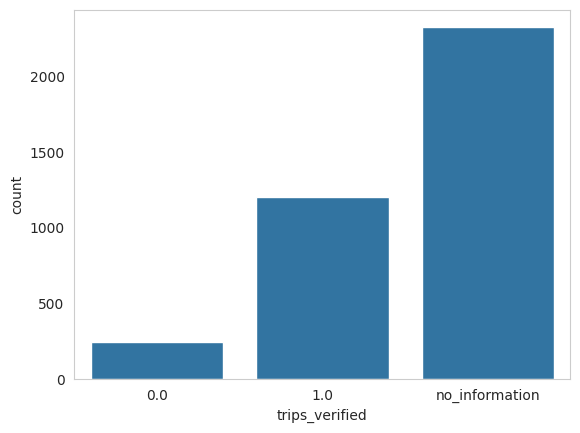

In [13]:
# Count plot on single categorical variable
sns.countplot(x ='trips_verified', data = reviews)

# Show the plot
plt.grid(False)  # Remove grid
plt.show()

---

## Sentiment Analysis

Sentiment analysis is the process of identifying and extracting the emotional tone and attitude of a text, such as positive, negative, or neutral. Sentiment analysis can help you understand how your customers feel about your products, services, or brand, and identify areas of improvement or praise. Python has several libraries and frameworks for sentiment analysis, such as TextBlob, Vader, Flair, and HuggingFace Transformers. We are going to use TextBlob library.

In [14]:
# Function to adjust sentiment based on negation handling
def adjust_sentiment_with_negation(text):
    blob = TextBlob(text)
    polarity = 0
    negation_multiplier = 1

    # Iterate through each word in the text
    for word, tag in blob.tags:
        # Check for negation words and adjust multiplier
        if tag == 'RB' and (word in ['not', 'never', 'no']):
            negation_multiplier = -1
        # Calculate polarity of the word and apply negation multiplier
        polarity += negation_multiplier * TextBlob(word).sentiment.polarity

    # Adjust sentiment label based on overall polarity
    if polarity > 0.5:
        sentiment_label = 'Positive'
    elif polarity < 0.5:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    # Return adjusted sentiment label and polarity score
    return sentiment_label, polarity

# Apply sentiment analysis with negation handling
reviews['sentiment_label_adjusted_with_negation'], reviews['sentiment_score'] = zip(*reviews['clean_reviews'].apply(adjust_sentiment_with_negation))

# Display the DataFrame with sentiment analysis results
reviews.head()

,trips_verified,reviews,clean_reviews,sentiment_label_adjusted_with_negation,sentiment_score
0,0.0,"The flight was comfortable enough but with an hour delay on the return leg. However, on both leg I was told I had to put my very small and expensive cabin case into the hold as the flight was full. Having done so I was not amused to see other passengers bringing much larger cases into the cabin. BA should stick to their cabin bag size limit and not inconvenience those who comply.",flight comfortable enough hour delay return leg however leg told put small expensive cabin case hold flight full done amused see passenger bringing much larger case cabin ba stick cabin bag size limit inconvenience comply,Negative,0.200000
1,1.0,"We had a really good flying experience with BA, travelling as a young family of 4. The flights left on time and we even arrived early for nearly each one of our flights. Food was generous and quite tasty for Economy class with the crew coming around with water/drinks throughout the flights. Our checked luggage also arrived safely and undamaged both at VCE and our return flight to YUL. On all of our flights the crew were attentive, friendly, and helpful with us and our children, especially the gentlemen who served us on the return flights from VCE to YUL on March 5th. The B787-8 interior is really dated and really needs to be updated to compete with their European counterparts. There were panels squeaking loudly when we hit turbulence, seat covers coming off the seats, and tray tables which were not level and loose for eating. The IFE on the B787-8 worked fine, but it definitely wasn't as responsive and did not have a newer, larger screen like the ones on the B777-200. Thankfully, the B777-200 have had their interior updated but the one we flew on had a clogged sink in one of the lavatories, which created problems for passengers. Unfortunately, on nearly all of our flights, there was garbage left in the seat pockets and the floors weren't quite as clean. On the incoming flight to LHR, the B787-8 was not assigned a gate because we arrived early into the airport, which resulted in significant delays for the airport buses to get to the plane and also slowed down the deplaning process. We would definitely consider flying trans-Atlantic with BA again, as we received value and service for the fare we paid.",really good flying experience ba travelling young family 4 flight left time even arrived early nearly one flight food generous quite tasty economy class crew coming around waterdrinks throughout flight checked luggage also arrived safely undamaged vce return flight yul flight crew attentive friendly helpful u child especially gentleman served u return flight vce yul march 5th b7878 interior really dated really need updated compete european counterpart panel squeaking loudly hit turbulence seat cover coming seat tray table level loose eating ife b7878 worked fine definitely wasnt responsive newer larger screen like one b777200 thankfully b777200 interior updated one flew clogged sink one lavatory created problem passenger unfortunately nearly flight garbage left seat pocket floor werent quite clean incoming flight lhr b7878 assigned gate arrived early airport resulted significant delay airport bus get plane also slowed deplaning process would definitely consider flying transatlantic ba received value service fare paid,Positive,3.756410
2,1.0,"Waited an hour to check-in at the Paphos business check-in. Staff utterly incompetent. Flight crew in business class removed my ruck sack from the flight bins without my consent to make way for another customer luggage. I was then coerced to have my luggage at my feet throughout my flight. Utterly outrageous, last thing you would expect in BA business class.",waited hour checkin paphos business checkin staff utterly incompetent flight crew business class removed ruck sack flight bin without consent make way another customer luggage coerced luggage foot throughout flight utterl

Now, let's do some visualization to understand better our results.

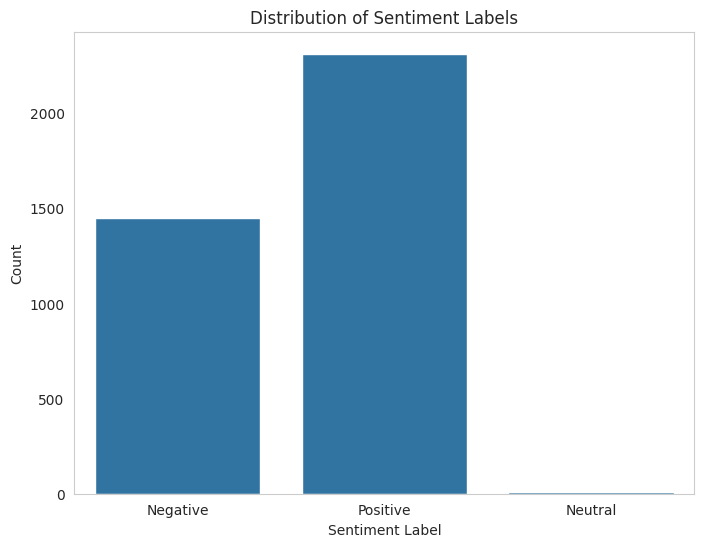

In [15]:
# Visualization of sentiment labels distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label_adjusted_with_negation', data=reviews)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.grid(False)  # Remove grid
plt.show()

We have 3771 total reviews in our dataset. From them almost 1400 are negative and the rest is positive which is almost half. From this maybe we should look deeply into both cases and try to understand why people gave negative reviews, which points need to be improved etc.

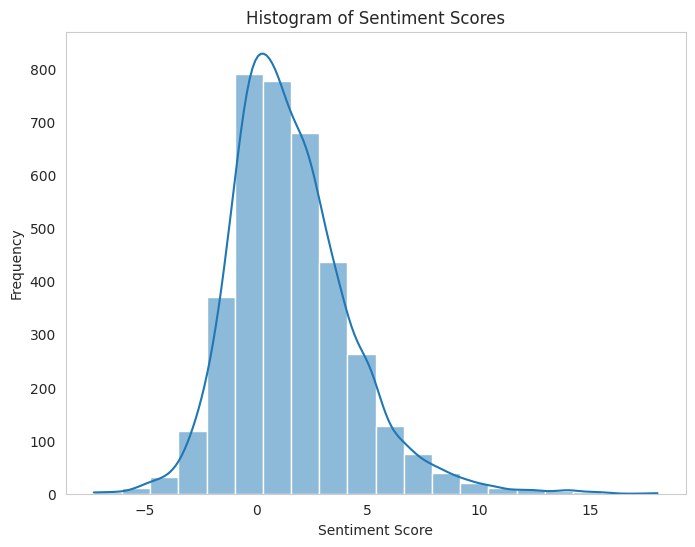

In [16]:
# Histogram of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(reviews['sentiment_score'], bins=20, kde=True)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(False)  # Remove grid
plt.show()

Yes, even though the number of positive reviews is higher than negative ones, the number of sentiment scores that are close to 0 is higher which means there are some common points shared with negative and positive reviews, and some positive reviews are close to negative also! So it is a good idea to try to get some insights from the positive and negative reviews.

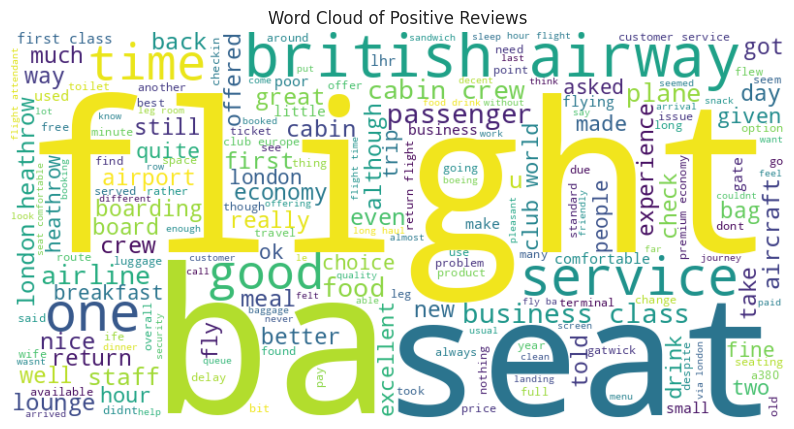

In [17]:
# Analysis of positive reviews
positive_reviews = reviews[reviews['sentiment_label_adjusted_with_negation'] == 'Positive']['clean_reviews']
negative_reviews = reviews[reviews['sentiment_label_adjusted_with_negation'] == 'Negative']['clean_reviews']

positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Reviews')
plt.axis('off')
plt.show()

Distribution of customer type and payment type is likely equal. On the other hand, when we look at the distribution of the category, the amount of sold fruits and vegetables is really high compared with the other categories.

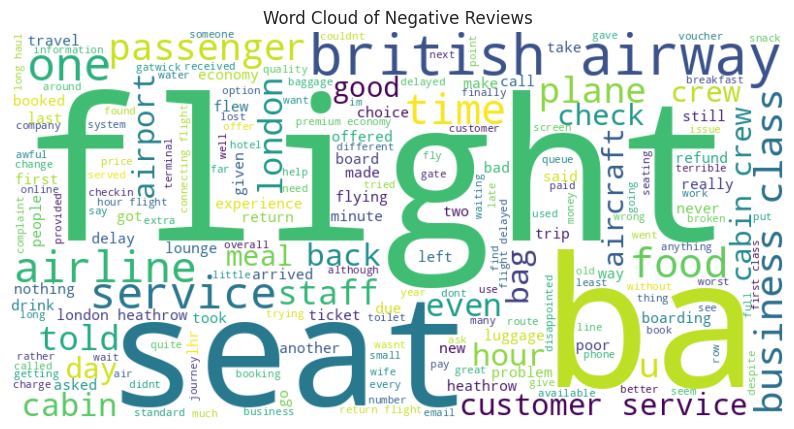

In [18]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Reviews')
plt.axis('off')
plt.show()

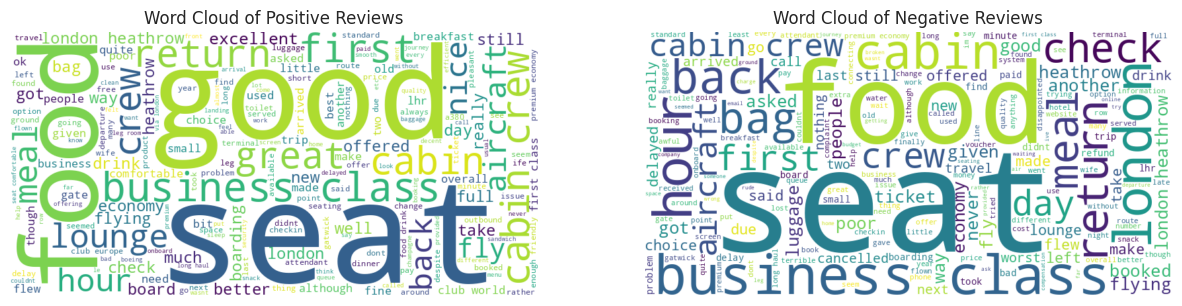

In [19]:
# Define additional stopwords specific to airline reviews
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["flight", "airline", "plane", "airport", "service", "time", "staff", "experience", "ba","british airway",
                         "british", "airway", "one", "passenger","u","told","even","customer"])

# Generate word cloud for positive reviews
positive_reviews = reviews[reviews['sentiment_label_adjusted_with_negation'] == 'Positive']['clean_reviews']
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(positive_text)

# Generate word cloud for negative reviews
negative_reviews = reviews[reviews['sentiment_label_adjusted_with_negation'] == 'Negative']['clean_reviews']
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(negative_text)

# Plot word clouds
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Reviews')
plt.axis('off')

plt.show()

---

## Topic Modelling

Topic modeling is the process of discovering and extracting the main themes or topics from a collection of texts. Topic modeling can help us find out what our customers are talking about, what are their main concerns or interests, and how they relate to each other. Python has many libraries and algorithms for topic modeling, such as LDA, NMF, LSA, and LDAvis. We will use LDA for this analysis



In [20]:
# Create a CountVectorizer object to convert text documents to a matrix of token counts
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')

# Fit and transform the text data to a document-term matrix
X = vectorizer.fit_transform(reviews['clean_reviews'])

# Initialize and fit Latent Dirichlet Allocation (LDA) model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Specify the number of topics
lda.fit(X)

# Display the topics and their top words
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Define the number of top words to display for each topic
n_top_words = 10

# Get the feature names from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the topics
print("Topics found via LDA:")
display_topics(lda, feature_names, n_top_words)

Topics found via LDA:
Topic 1:
seat class ba business economy flight food cabin airway british
Topic 2:
flight ba service airline crew british food cabin london airway
Topic 3:
flight ba customer airway british hour day service told london
Topic 4:
flight hour time minute bag boarding passenger plane staff seat
Topic 5:
flight good crew food service time lounge ba cabin seat


In [21]:
# Separate positive and negative sentiment reviews
positive_reviews = reviews[reviews['sentiment_label_adjusted_with_negation'] == 'Positive']['clean_reviews']
negative_reviews = reviews[reviews['sentiment_label_adjusted_with_negation'] == 'Negative']['clean_reviews']

# Apply CountVectorizer separately for positive and negative sentiment reviews
vectorizer_positive = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
vectorizer_negative = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')

# Fit and transform positive and negative sentiment reviews to document-term matrices
X_positive = vectorizer_positive.fit_transform(positive_reviews)
X_negative = vectorizer_negative.fit_transform(negative_reviews)

# Initialize and fit LDA models separately for positive and negative sentiment reviews
lda_positive = LatentDirichletAllocation(n_components=5, random_state=42)
lda_negative = LatentDirichletAllocation(n_components=5, random_state=42)

lda_positive.fit(X_positive)
lda_negative.fit(X_negative)

# Display topics and their top words for positive sentiment reviews
print("Topics found via LDA for Positive Sentiment:")
display_topics(lda_positive, vectorizer_positive.get_feature_names_out(), n_top_words)

# Display topics and their top words for negative sentiment reviews
print("\nTopics found via LDA for Negative Sentiment:")
display_topics(lda_negative, vectorizer_negative.get_feature_names_out(), n_top_words)

Topics found via LDA for Positive Sentiment:
Topic 1:
ba flight service crew club airline return food cabin economy
Topic 2:
flight ba told hour airway british customer day london time
Topic 3:
flight crew time cabin london service heathrow ba staff drink
Topic 4:
good flight lounge food crew time seat service club cabin
Topic 5:
seat class ba flight business economy food good british airway

Topics found via LDA for Negative Sentiment:
Topic 1:
bag boarding flight ba baggage passenger luggage check hour time
Topic 2:
flight ba staff hour time heathrow service airline food london
Topic 3:
class business ba flight plane seat lounge london economy minute
Topic 4:
flight ba airway british customer hour service london airline day
Topic 5:
seat flight ba food cabin service economy crew meal british


Topics found via LDA for Positive Sentiment (Bar Plots):


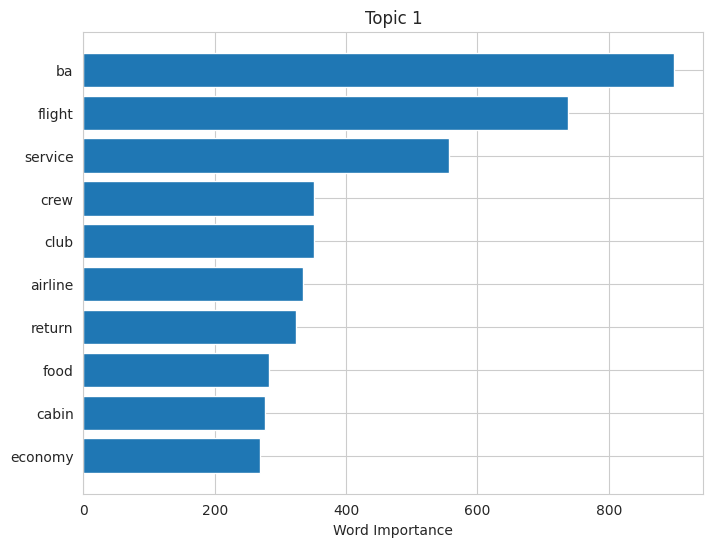

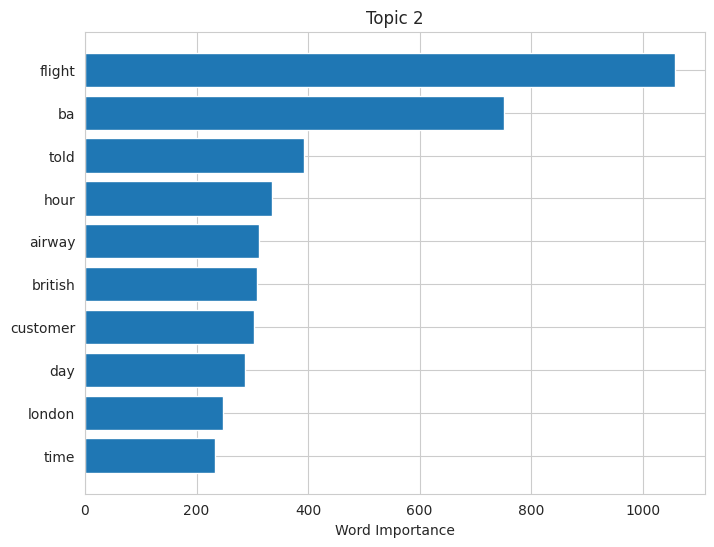

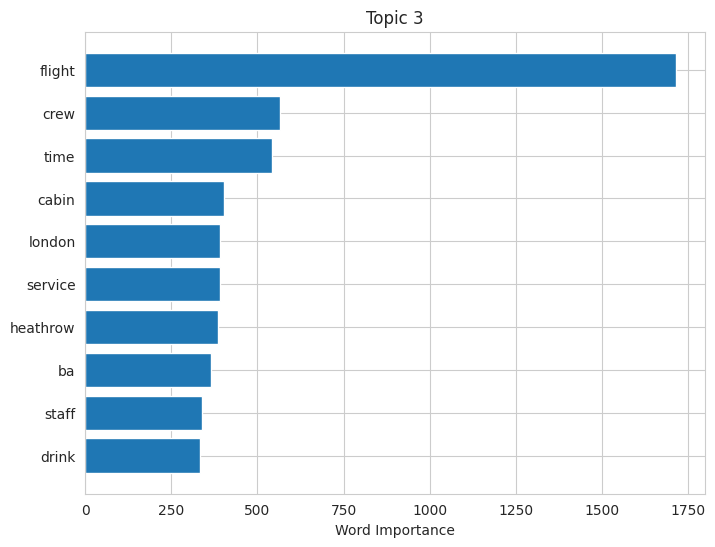

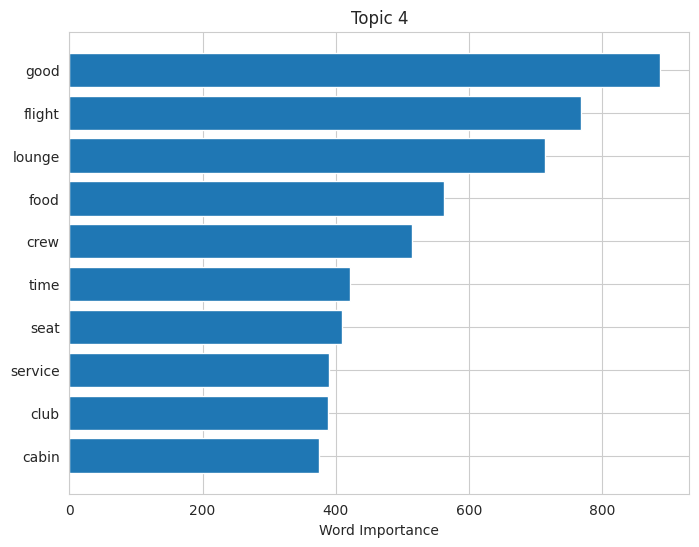

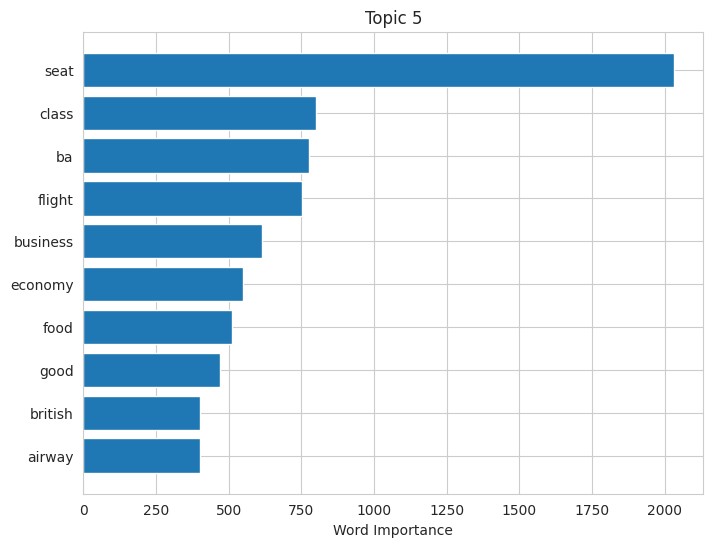

Topics found via LDA for Negative Sentiment (Bar Plots):


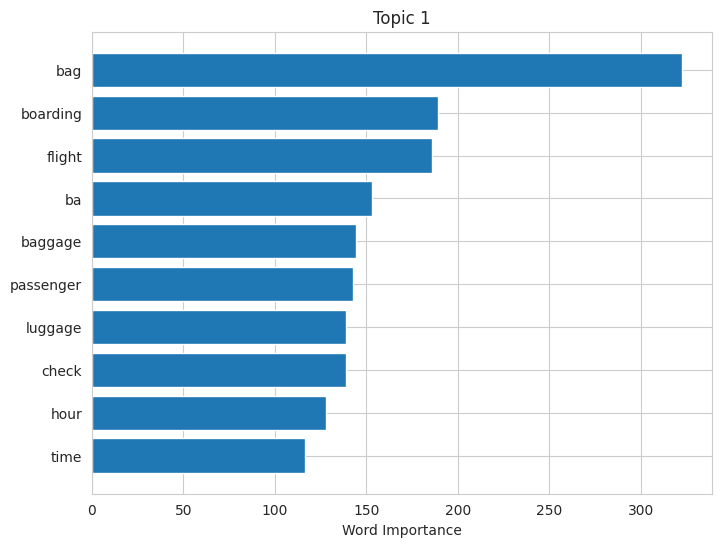

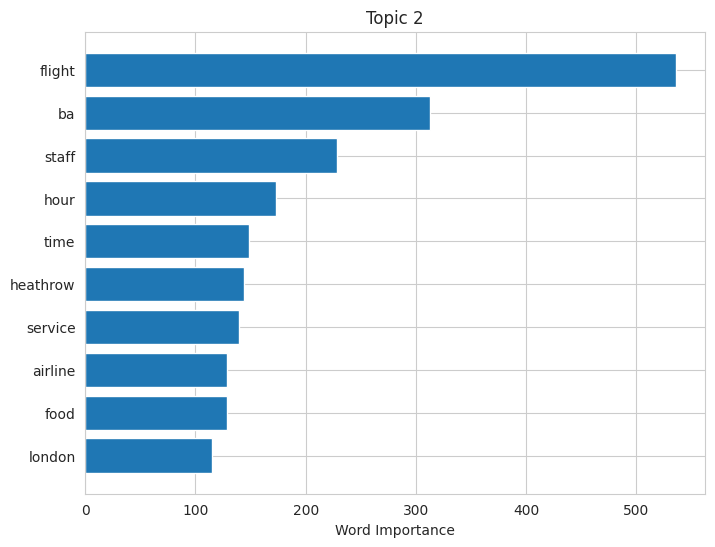

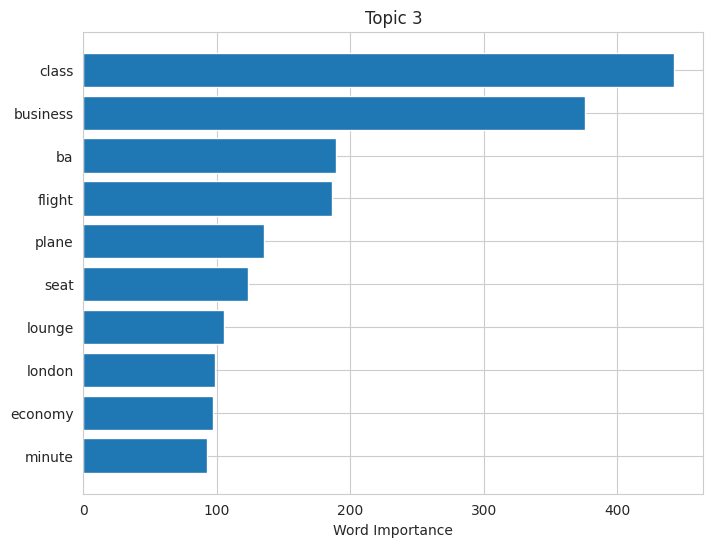

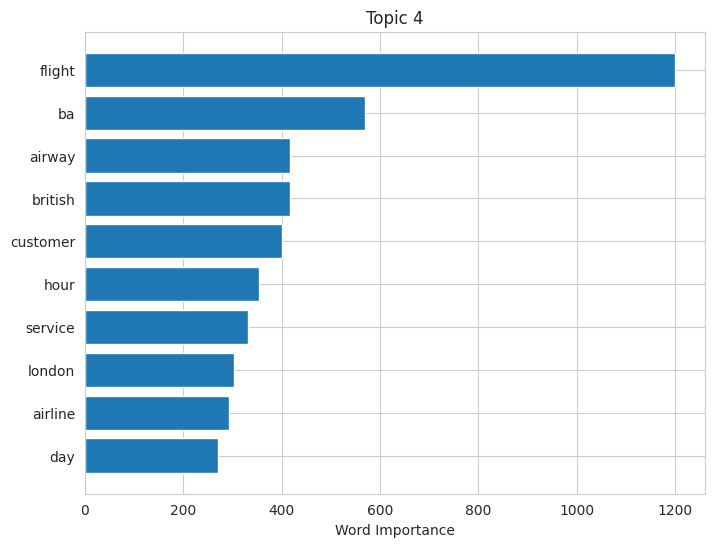

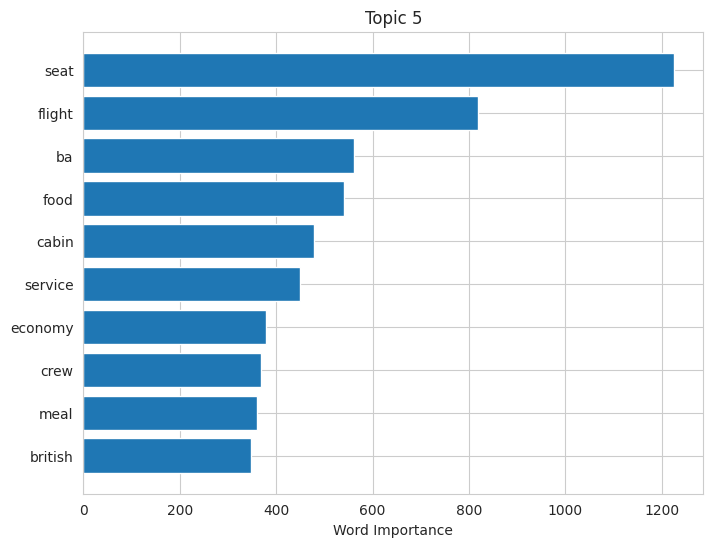

In [26]:
# Function to display topics and their top words as bar plots
def display_topics_bar_plot(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        words = [feature_names[i] for i in top_words_indices]
        scores = [topic[i] for i in top_words_indices]
        plt.figure(figsize=(8, 6))
        plt.barh(range(len(words)), scores, align='center')
        plt.yticks(range(len(words)), words)
        plt.gca().invert_yaxis()
        plt.xlabel('Word Importance')
        plt.title(f'Topic {topic_idx + 1}')
        plt.show()

# Display topics and their top words for positive sentiment reviews as bar plots
print("Topics found via LDA for Positive Sentiment (Bar Plots):")
display_topics_bar_plot(lda_positive, vectorizer_positive, n_top_words)

# Display topics and their top words for negative sentiment reviews as bar plots
print("Topics found via LDA for Negative Sentiment (Bar Plots):")
display_topics_bar_plot(lda_negative, vectorizer_negative, n_top_words)